In [6]:
import time
import math
import numpy as np
import tensorly as tl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes
from online_tensor_decomposition_fcp01 import *

In [3]:
# for sample video
from cv2 import VideoWriter, VideoWriter_fourcc, imshow, imwrite

def make_video(tensor, filename, isColor=True):
    start = time.time()
    height = tensor.shape[1]
    width = tensor.shape[2]
    FPS = 24

    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter(filename, fourcc, float(FPS), (width, height), isColor)

    for frame in tensor:
        video.write(np.uint8(frame))
    video.release()
    print('created', filename, time.time()-start)

In [10]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [4]:
results = {}
with open('results_0117.p', 'rb') as fp:
    results = pickle.load(fp)

In [11]:
with open('video.p', 'wb') as fp:
    pickle.dump(results, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
def plot_local(datasets, name, labelpad=50):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][3]], [results[dataset][lib][1]]]
                        points.append(point)


#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps1)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)
#         bax.set_ylim([0.97,0.99])
#         bax.set_yscale('log') 
#         bax.set_xscale('log')


#         bax.tick_params(axis = 'y', labelsize =8)
        bax.set_ylabel('Average of Local Fitness', size = 10, labelpad=labelpad)
        bax.set_xlabel('Average of Local Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
#         plt.savefig(f'./plots/{name}_local.pdf',bbox_inches = 'tight', pad_inches = 0)
        plt.savefig(f'./plots/{name}_local.svg',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

In [7]:
def plot_global(datasets, name, labelpad=50):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][2]], [results[dataset][lib][0]]]
                        points.append(point)
#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps2)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)

#         bax.set_ylim([0.97,0.99])
#         bax.set_xscale('log') 
        bax.set_ylabel('Global Fitness', size = 10, labelpad=labelpad)
        bax.set_xlabel('Global Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_global.svg',bbox_inches = 'tight', pad_inches = 0)
#         plt.savefig(f'./plots/{name}_global.pdf',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

### Synthetic Data

In [8]:
import csv
synthetic_data = tl.tensor(np.zeros([1000, 10, 20, 30], dtype='f'))

for i in range(200):
    start = time.time()
    with open('../Data/synthetic_data/data_normal/data{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            synthetic_data[tuple(indices)] = np.double(row[-1])
    print('>> synthetic_data{} loaded '.format(i), time.time() - start)

>> synthetic_data0 loaded  0.8036372661590576
>> synthetic_data1 loaded  0.7937493324279785
>> synthetic_data2 loaded  0.791825532913208
>> synthetic_data3 loaded  0.7583863735198975
>> synthetic_data4 loaded  0.8618288040161133
>> synthetic_data5 loaded  0.7982239723205566
>> synthetic_data6 loaded  0.8991434574127197
>> synthetic_data7 loaded  1.0349154472351074
>> synthetic_data8 loaded  0.8069455623626709
>> synthetic_data9 loaded  0.8092312812805176
>> synthetic_data10 loaded  0.9315512180328369
>> synthetic_data11 loaded  0.8319196701049805
>> synthetic_data12 loaded  0.7559518814086914
>> synthetic_data13 loaded  0.7368896007537842
>> synthetic_data14 loaded  1.001147747039795
>> synthetic_data15 loaded  1.3474411964416504
>> synthetic_data16 loaded  0.8665621280670166
>> synthetic_data17 loaded  0.7760329246520996
>> synthetic_data18 loaded  0.7544364929199219
>> synthetic_data19 loaded  0.7518587112426758
>> synthetic_data20 loaded  0.8361003398895264
>> synthetic_data21 loade

### Sample Video

In [4]:
import csv
sample_video = tl.tensor(np.zeros([205, 240, 320, 3], dtype='d'))

for i in range(41):
    start = time.time()
    with open('../Data/sample_video/data/video{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            sample_video[tuple(indices)] = np.double(row[-1])
    print('>> sample_video{} loaded '.format(i), time.time() - start)

>> sample_video0 loaded  17.943934202194214
>> sample_video1 loaded  18.175222873687744
>> sample_video2 loaded  18.29034399986267
>> sample_video3 loaded  18.185331106185913
>> sample_video4 loaded  18.23938298225403
>> sample_video5 loaded  18.205886602401733
>> sample_video6 loaded  18.270495891571045
>> sample_video7 loaded  18.050713300704956
>> sample_video8 loaded  18.23133420944214
>> sample_video9 loaded  18.222721338272095
>> sample_video10 loaded  18.293696880340576
>> sample_video11 loaded  18.25161385536194
>> sample_video12 loaded  18.053239583969116
>> sample_video13 loaded  18.167654991149902
>> sample_video14 loaded  18.11659526824951
>> sample_video15 loaded  18.15689444541931
>> sample_video16 loaded  18.233609199523926
>> sample_video17 loaded  18.1990008354187
>> sample_video18 loaded  18.265703439712524
>> sample_video19 loaded  18.208263397216797
>> sample_video20 loaded  17.94605541229248
>> sample_video21 loaded  18.154611587524414
>> sample_video22 loaded  18.

### Stock

In [139]:
import csv

stock2_tensor = tl.tensor(np.zeros([3089, 140, 5], dtype=float))
start = time.time()
with open('../Data/stock/KOSPI140/Stock.tensor') as file:
    reader = csv.reader(file, delimiter='\t')    
    for row in reader:
        indices = np.asarray([index for index in np.int64(np.asarray(row[:-1]))])[[1, 0, 2]]
        stock2_tensor[tuple(indices)] = np.double(row[-1])
print('>> stock tensor loaded ', time.time() - start)

>> stock tensor loaded  36.043638944625854


### Hall from OLSTEC
* `hall1-200.mat`: 144 * 176 * 200 => 200 * 144 * 176
* `hall_144x100_frame2900-3899_pan.mat`: 144 * 100 * 1000 => 1000 * 144 * 100

In [11]:
from scipy.io import loadmat
import h5py

hall1 = loadmat('../Data/hall/hall1-200.mat')['XO']
hall1 = np.moveaxis(hall1, -1, 0)
hall1 = hall1.reshape(200, 144, 176, order='F')

with h5py.File('../Data/hall/hall_144x100_frame2900-3899_pan.mat', 'r') as f:
    hall2 = np.array(f['X0'])
    hall2 = hall2.reshape(1000, 144, 100, order='F')
    
hall1_tensor = tl.tensor(hall1, dtype='f')
hall2_tensor = tl.tensor(hall2, dtype='f')
print(hall1_tensor.shape, hall2_tensor.shape)
# make_video(hall1, 'hall1.avi', False)
# make_video(hall2, 'hall2.avi', False)

(200, 144, 176) (1000, 144, 100)


### Air Quality Tensor
* `<date> <location> <air pollutants> (measurement)`
* Beijing Air Quality
  * 2,454,305 out of 2,524,536 (35,063 * 12 * 6)
* Korea Air Quality
  * 11,270,028 out of 18,368,364 (9,478 * 323 * 6)
* Madrid Air Quality
  * 8,036,759 out of 21,587,328 (64,248 * 24 * 14)

In [12]:
# beijing_df = pd.read_csv('../../Data/air_quality/BeijingAirQuality/beijing.tensor', delimiter='\t', header=None)
korea_df = pd.read_csv('../../Data/air_quality/KoreaAirQuality/korea_airquality.tensor', delimiter='\t', header=None)
# madrid_df = pd.read_csv('../../Data/air_quality/MadridAirQuality/1hour_madrid.tensor', delimiter='\t', header=None)

In [13]:
def get_tensor(df):
    start = time.time()

    dims = df[[0,1,2]].max()+1
    tensor = np.empty(dims) * np.nan
    tensor.shape

    for i, row in df.iterrows():
        indices = [[index] for index in np.int64(np.asarray(row[:-1]))]
        tensor[tuple(indices)] = np.double(row[3])

    avg = []
    for i in range(tensor.shape[2]):
        avg.append(np.nanmean(tensor[:,:,i]))
    inds = np.where(np.isnan(tensor))
    for ind in zip(inds[0], inds[1], inds[2]):
        tensor[ind] = avg[ind[-1]]
        
    print(time.time() - start)
    return tensor

In [14]:
# beijing_tensor = get_tensor(beijing_df)
korea_tensor = get_tensor(korea_df)
# madrid_tensor = get_tensor(madrid_df)

1669.1081686019897


In [158]:
with open('results_0128.p', 'wb') as fp:
    pickle.dump(results, fp, protocol=pickle.HIGHEST_PROTOCOL)

---
# Experiment #1

In [121]:
from online_tensor_decomposition_fcp_abridged06 import *
# results = {}

In [122]:
# synthetic
(n_iter, ul, ll) = (1, 1.2, 1.1)
tensor_stream = create_tensor_stream(synthetic_data, start_to_stream=10, batch_sizes=np.full((99), 10, dtype=int))
# results['synthetic-10'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-20'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-30'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-40'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['synthetic-50'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.713670015335083

 >> dao rank-20 n_iter-1
||A-B||: 193886.32376586014
split: 4 refine: 0
global fitness 0.21057739563552358
local fitness 0.2105590327956417
global running time 10.216430187225342
local running time 0.10229137562742138
memory usage 117824

 >> dtd rank-20 n_iter-1
||A-B||: 235548.241792853
global fitness 0.04094779416138816
local fitness 0.04212982770022278
global running time 4.002760171890259
local running time 0.038560006281342166
memory usage 180560

 >> ocp rank-20 n_iter-1
||A-B||: 235563.61192376484
global fitness 0.04088521352889085
local fitness 0.042125616062080096
global running time 2.333649158477783
local running time 0.021608115374439893
memory usage 1799456

 >> fcp rank-20 n_iter-1
0th_iter: 1.4062833786010742 0.21097153122038248
-1th_iter: 21.176880359649658 0.07943312471221886
global fitness 0.07943312471221886
local fitness 0.08436459104597258
local running time 11.291581869125366

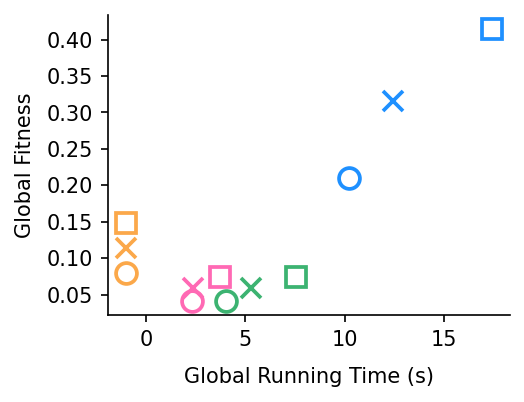

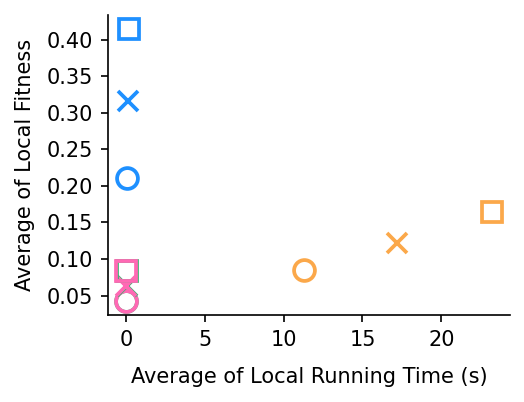

In [123]:
datasets = ('synthetic-20', 'synthetic-30', 'synthetic-40')
plot_global(datasets, 'E1_synthetic', 35)
plot_local(datasets, 'E1_synthetic', 35)

In [124]:
# video
(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
# results['video-10'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-20'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-30'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-40'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['video-50'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 12.149021625518799

 >> dao rank-20 n_iter-1
||A-B||: 124134.15716342445
split: 3 refine: 12
global fitness 0.8609297493999217
local fitness 0.874881494233301
global running time 70.3353865146637
local running time 1.7437363499548377
memory usage 465928

 >> dtd rank-20 n_iter-1
||A-B||: 169553.51372952835
global fitness 0.810045436459152
local fitness 0.8094317481451929
global running time 27.296849727630615
local running time 0.5241062933351935
memory usage 214320

 >> ocp rank-20 n_iter-1
||A-B||: 204466.77583590988
global fitness 0.7709313342543214
local fitness 0.812262318707623
global running time 29.38226580619812
local running time 0.5637162381555976
memory usage 62903136

 >> fcp rank-20 n_iter-1
0th_iter: 12.816550970077515 0.8833460598629129
-1th_iter: 680.2721190452576 0.8482919247375622
global fitness 0.8482919247375622
local fitness 0.8402336322324491
local running time 346.54433500766754
memory usage 3

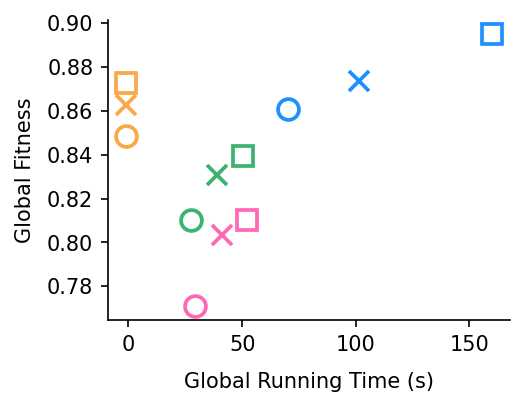

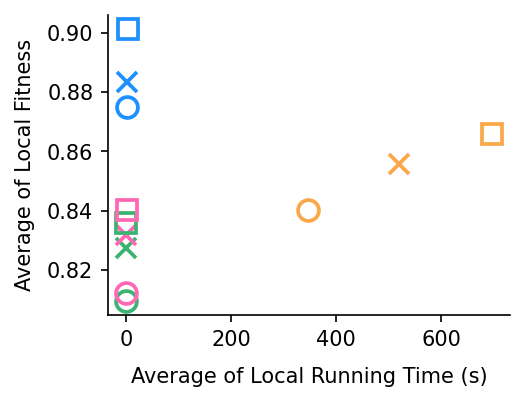

In [125]:
datasets = ('video-20', 'video-30', 'video-40')
plot_global(datasets, 'E1_video', 35)
plot_local(datasets, 'E1_video', 35)

In [157]:
# stock
(n_iter, ul, ll) = (1, 5, 3)
tensor_stream = create_tensor_stream(stock2_tensor, start_to_stream=5, batch_sizes=np.full((1028), 3, dtype=int))
results['stock-25'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-30'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-35'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=35, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 0.31671833992004395

 >> dao rank-25 n_iter-1
||A-B||: 2563.085294402769
split: 425 refine: 2
global fitness 0.6513365700634322
local fitness 0.5138140501110453
global running time 92.79685759544373
local running time 0.0898376877264446
memory usage 762328

 >> dtd rank-25 n_iter-1
||A-B||: 4094.305867568269
global fitness 0.4430404910389839
local fitness 0.19960999235680166
global running time 17.976489543914795
local running time 0.016223511581121078
memory usage 676896

 >> ocp rank-25 n_iter-1
||A-B||: 4187.164491415576
global fitness 0.4304086811025394
local fitness 0.1959602756729668
global running time 4.713186025619507
local running time 0.0032762078054376265
memory usage 148736

 >> fcp rank-25 n_iter-1
0th_iter: 0.5309092998504639 0.9999999999984639
-1th_iter: 64.63452529907227 0.5700551653647741
global fitness 0.5700551653647741
local fitness 0.4279599483539797
local running time 32.582717299461365
memory 

In [ ]:
datasets = ('stock-20', 'stock-22', 'stock-24')
plot_global(datasets, 'E1_stock', 50)
plot_local(datasets, 'E1_stock', 45)

In [129]:
# hall
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
# results['hall-10'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-15'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-20'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-25'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-30'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-35'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=35, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-40'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['hall-45'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=45, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.9623475074768066

 >> dao rank-30 n_iter-1
||A-B||: 39781.40409782285
split: 6 refine: 6
global fitness 0.8875513431573154
local fitness 0.90071624111764
global running time 14.027456760406494
local running time 0.7482190621526618
memory usage 469496

 >> dtd rank-30 n_iter-1
||A-B||: 43733.808355490895
global fitness 0.8763792249238516
local fitness 0.876805300145537
global running time 3.040923833847046
local running time 0.15289258831425717
memory usage 202696

 >> ocp rank-30 n_iter-1
||A-B||: 44709.18360093956
global fitness 0.8736221669779177
local fitness 0.8797113889932442
global running time 2.1785783767700195
local running time 0.107492658966466
memory usage 892536

 >> fcp rank-30 n_iter-1
0th_iter: 1.837256908416748 0.8897830963809157
-1th_iter: 45.96700167655945 0.8913391558864298
global fitness 0.8913391558864298
local fitness 0.892904558882269
local running time 23.902129292488098
memory usage 202754

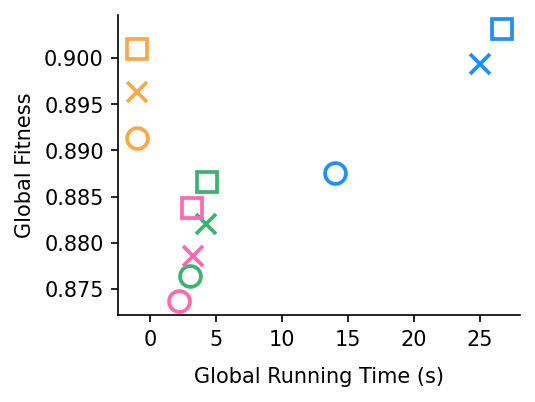

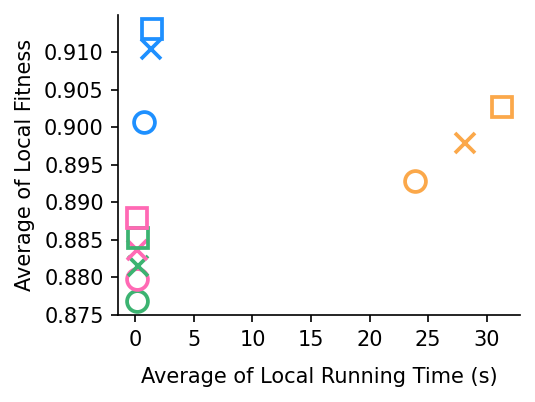

In [130]:
datasets = ('hall-30', 'hall-35', 'hall-40')
plot_global(datasets, 'E1_hall', 40)
plot_local(datasets, 'E1_hall', 40)

In [131]:
# korea air-quality
(n_iter, ul, ll) = (1, 2, 1.3)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
# results['korea-10'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['korea-15'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['korea-20'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['korea-25'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-30'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-40'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-50'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 3.3840491771698

 >> dao rank-30 n_iter-1
||A-B||: 11329.797978155706
split: 47 refine: 4
global fitness 0.8858368087356556
local fitness 0.8843522275716352
global running time 194.6142771244049
local running time 2.0659611106052376
memory usage 1865256

 >> dtd rank-30 n_iter-1
||A-B||: 18067.31735320405
global fitness 0.8179470975030393
local fitness 0.813070320043051
global running time 14.138387203216553
local running time 0.08669209304074824
memory usage 2433976

 >> ocp rank-30 n_iter-1
||A-B||: 18352.779050835827
global fitness 0.815070680955435
local fitness 0.8107843886821923
global running time 10.556805610656738
local running time 0.04751757181772059
memory usage 8044296

 >> fcp rank-30 n_iter-1
0th_iter: 3.3332278728485107 0.8382371725511637
-1th_iter: 607.18554520607 0.8292310785011408
global fitness 0.8292310785011408
local fitness 0.8288203381010667
local running time 305.25938653945923
memory usage 1

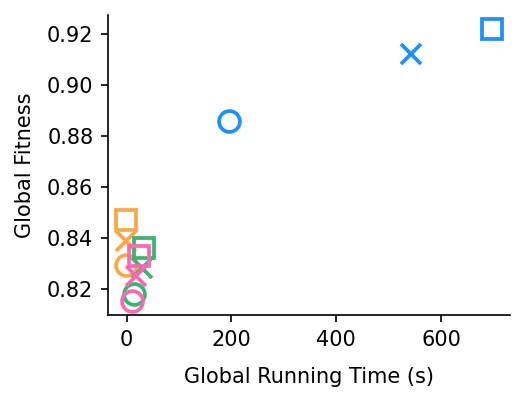

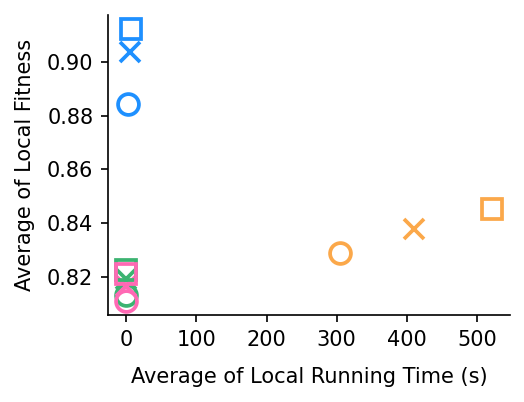

In [132]:
datasets = ('korea-30', 'korea-40', 'korea-50')
plot_global(datasets, 'E1_korea', 35)
plot_local(datasets, 'E1_korea', 35)

---
# Experiment #2

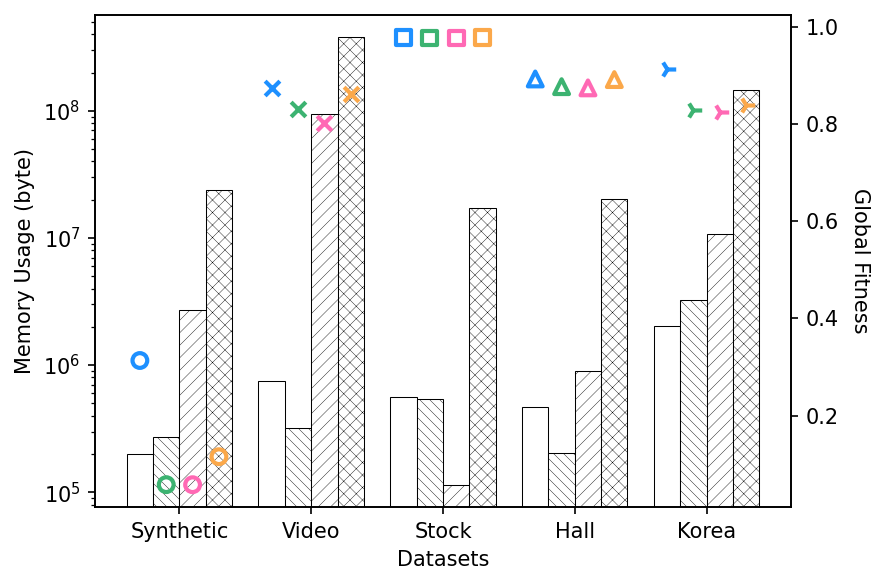

In [30]:
from matplotlib import colors
def make_rgb_transparent(color, alpha=0.6, bg_rgb=(1,1,1)):
    rgb = colors.colorConverter.to_rgb(color)
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    
    index = np.arange(5)
    bar_width = 0.2

    
    # create plot
    fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 150)
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))
    plt.rcParams['hatch.linewidth'] = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        
        rects1 = ax1.bar(index + bar_width*i, mem_list, bar_width, color=make_rgb_transparent(color, alpha=0.0), label=lib, edgecolor='black', hatch=patterns[i], linewidth=0.5)

    ax1.set_xlabel('Datasets')
    ax1.set_ylabel('Memory Usage (byte)')
    ax1.set_yscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][0] for dataset in datasets]
        for j, acc in enumerate(acc_list):
            if j == 4:
                ax2.scatter(index[j] + bar_width*i, acc, 70, color=colors[i], marker=markers[j], linewidth=2)
            elif j == 1: 
                ax2.scatter(index[j] + bar_width*i, acc, 50, color=colors[i], marker=markers[j], linewidth=2)
            else:
                ax2.scatter(index[j] + bar_width*i, acc, 50, color=colors[i], marker=markers[j], facecolors='none', linewidth=2)
    ax2.tick_params(axis='y')

    ax2.set_ylabel('Global Fitness', rotation=270, labelpad=15)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
#     plt.savefig(f'./plots/{name}_mem.pdf', bbox_inches = 'tight', pad_inches = 0)
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-30', 'korea-40'), 'E2')

[199424, 744488, 557472, 469496, 2024776]
[270160, 320800, 541736, 202696, 3244936]
[2717056, 94372576, 114616, 892536, 10744216]
[24000232, 377856232, 17298616, 20275416, 146962632]
[120.34776155327343, 507.53837805310496, 31.030466104127203, 43.18549252815785, 72.5821681015579]


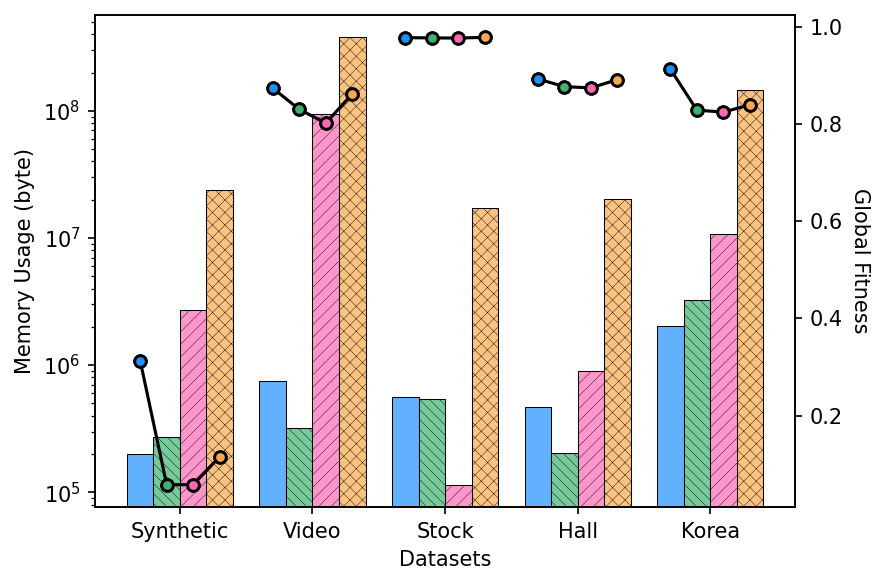

In [34]:
from matplotlib import colors
def make_rgb_transparent(color, alpha=0.6, bg_rgb=(1,1,1)):
    rgb = colors.colorConverter.to_rgb(color)
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    
    index = np.arange(5)
    bar_width = 0.2

    
    # create plot
    fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 150)
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))
    plt.rcParams['hatch.linewidth'] = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        print(mem_list)
        
        rects1 = ax1.bar(index + bar_width*i, mem_list, bar_width, color=make_rgb_transparent(color, alpha=0.7), label=lib, edgecolor='black', hatch=patterns[i], linewidth=0.5)

    ax1.set_xlabel('Datasets')
    ax1.set_ylabel('Memory Usage (byte)')
    ax1.set_yscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    for i, dataset in enumerate(datasets):
        acc_list = [results[dataset][lib][0] for lib in libs]   
        ax2.plot(i + bar_width*index[:4], acc_list, marker="o", color='black', zorder=1)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][0] for dataset in datasets]        
        ax2.scatter(index + bar_width*i, acc_list, 30, color='black', marker="o", facecolor=colors[i], linewidth=1.3, zorder=2)
    ax2.tick_params(axis='y')

    ax2.set_ylabel('Global Fitness', rotation=270, labelpad=13)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()
    plt.savefig(f'./plots/{name}_mem.svg', bbox_inches = 'tight', pad_inches = 0)
    
    print([results[dataset]['fcp'][4]/results[dataset]['dao'][4] for dataset in datasets])
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-30', 'korea-40'), 'E2')



---
# Experiment #5

In [7]:
from online_tensor_decomposition_fcp01 import *
results = {}

(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
results['video'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 32.11152482032776

 >> dao rank-30 n_iter-1
||A-B||: 111795.94174366337
split: 3 refine: 11
global fitness 0.8747525258991002
local fitness 0.8873747705766921
global running time 150.47768235206604
local running time 0.7394831120967865
memory usage 742112
-----------------------------------
making init decomposition result: 27.662038803100586

 >> dtd rank-30 n_iter-1
||A-B||: 160995.13041474298
global fitness 0.8196335831829565
local fitness 0.8179841138527254
global running time 46.44625663757324
local running time 0.40196204781532285
memory usage 320816
-----------------------------------
making init decomposition result: 28.197503328323364

 >> ocp rank-30 n_iter-1
||A-B||: 160593.53251112852
global fitness 0.8200835022251635
local fitness 0.8346877839659794
global running time 42.20498609542847
local running time 0.28070032596588135
memory usage 94372592
-----------------------------------
making init decomposit

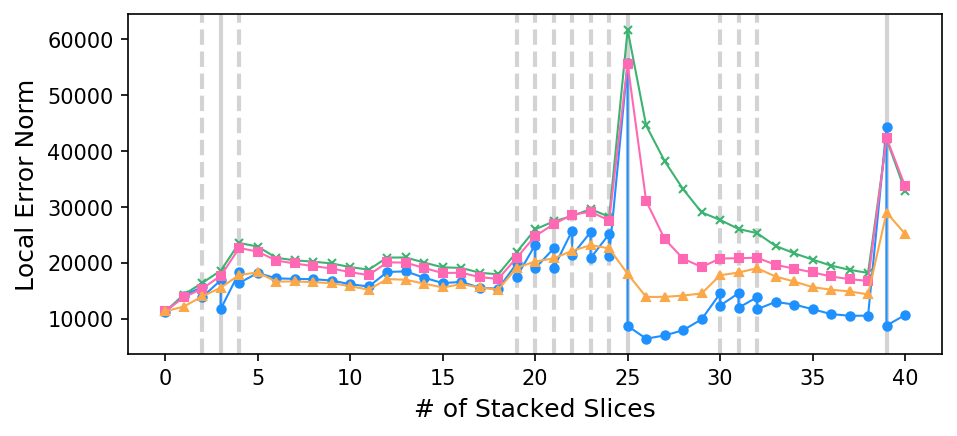

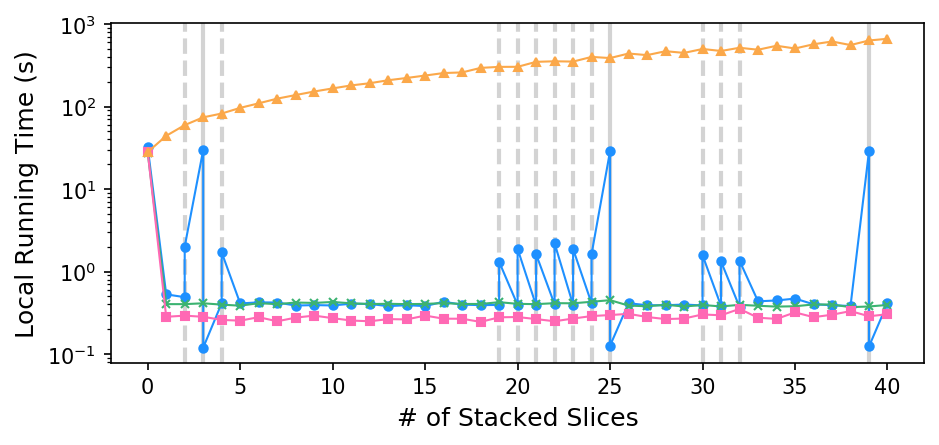

In [17]:
def plot_E5_error(dataset):
    
    markers = ("+", "x", "1", "2")
    markers = ("o", "x", "s", "^")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", "fcp")
    fig = plt.figure(figsize = (7, 3), dpi = 150,) 
    plt.ylabel('Local Error Norm', fontsize=12)
    plt.xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        plt.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker=marker, color=color, markersize=4)
    plt.savefig('plots/E5_{}_error.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)
    
plot_E5_error('video')
    
def plot_E5_rt(dataset):
    markers = ("+", "x", "1", "2")
    markers = ("o", "x", "s", "^")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", "fcp")
    plt.figure(figsize = (7, 3), dpi = 150,) 
    
    plt.yscale('log')
    plt.ylabel('Local Running Time (s)', fontsize=12)
    plt.xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        plt.plot(verbose_list[:,0], verbose_list[:,1], linewidth=1, marker=marker, color=color, markersize=4)
        plt.savefig('plots/E5_{}_rt.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)
        
plot_E5_rt('video')

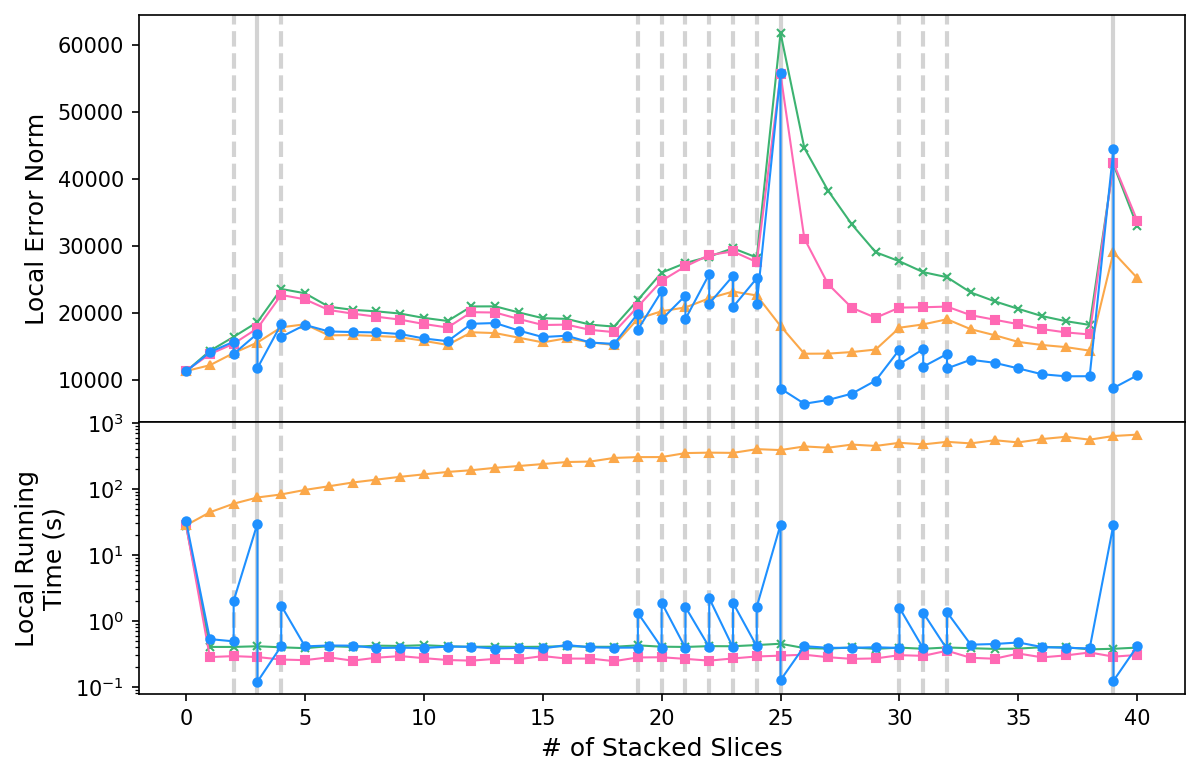

In [20]:
from matplotlib import gridspec

def plot_E5(dataset):
    
    markers = ("x", "1", "2", "+")
    markers = ("x", "s", "^", "o")
    colors = ('mediumseagreen', 'hotpink', '#fba84a', 'dodgerblue')
    libs = ("dtd", "ocp", "fcp", "dao")
    
    fig = plt.figure(figsize = (9, 6), dpi = 150)
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1]) 
    ax1 = plt.subplot(gs[0])
    
    ax1.set_ylabel('Local Error Norm', fontsize=12)
#     ax1.set_xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax1.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker=marker, color=color, markersize=4)
        
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.set_yscale('log')
    ax2.set_ylabel('Local Running\nTime (s)', fontsize=12)
    ax2.set_xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax2.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax2.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax2.plot(verbose_list[:,0], verbose_list[:,1], linewidth=1, marker=marker, color=color, markersize=4)
        
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig('plots/E5_{}.svg'.format(dataset), bbox_inches='tight', pad_inches=0)
    plt.show()
    
plot_E5('video')

---
# Experiment #3

In [32]:
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea--'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=-1, verbose=False)

-----------------------------------
making init decomposition result: 3.9404895305633545

 >> dao rank-20 n_iter-1
||A-B||: 19400.89340500859
split: 0 refine: 0
global fitness 0.8045094971008745
local fitness 0.8065634808944361
global running time 16.136921405792236
local running time 0.06728915965303461
memory usage 1649624


In [33]:
# korea air-quality
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea-split-1.0'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.0, ll=-1, verbose=False) # 65
results['korea-split-1.2'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.2, ll=-1, verbose=False) # 57
results['korea-split-1.4'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.4, ll=-1, verbose=False) # 45
results['korea-split-1.6'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.6, ll=-1, verbose=False) # 36
results['korea-split-1.8'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.8, ll=-1, verbose=False) # 5

-----------------------------------
making init decomposition result: 5.870425701141357

 >> dao rank-20 n_iter-1
||A-B||: 12327.792981219713
split: 65 refine: 0
global fitness 0.8757806458071262
local fitness 0.8834240071437058
global running time 393.6670153141022
local running time 0.023010649579636593
memory usage 277528
-----------------------------------
making init decomposition result: 4.836164712905884

 >> dao rank-20 n_iter-1
||A-B||: 13826.790361131174
split: 49 refine: 0
global fitness 0.8606761995568463
local fitness 0.8677862598472321
global running time 292.6102774143219
local running time 0.02988041969055825
memory usage 405416
-----------------------------------
making init decomposition result: 4.468388319015503

 >> dao rank-20 n_iter-1
||A-B||: 14114.952710966421
split: 45 refine: 0
global fitness 0.85777257024917
local fitness 0.8646404078538295
global running time 273.09932470321655
local running time 0.03360834020249387
memory usage 405320
----------------------

In [34]:
# korea air-quality
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea-refine-1.4'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.4, verbose=False) # 15
results['korea-refine-1.6'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.6, verbose=False) # 14
results['korea-refine-1.8'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.8, verbose=False) # 12
results['korea-refine-2.0'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=2.0, verbose=False) # 8
results['korea-refine-2.2'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=2.2, verbose=False) # 6

-----------------------------------
making init decomposition result: 3.938455820083618

 >> dao rank-20 n_iter-1
||A-B||: 19147.808655917954
split: 0 refine: 16
global fitness 0.8070596716646425
local fitness 0.8091856567637306
global running time 18.061325550079346
local running time 0.09100013844510342
memory usage 2082904
-----------------------------------
making init decomposition result: 5.087310791015625

 >> dao rank-20 n_iter-1
||A-B||: 19179.962935910862
split: 0 refine: 12
global fitness 0.8067356733705975
local fitness 0.8084551818322515
global running time 19.628258228302002
local running time 0.09365169799074213
memory usage 2082904
-----------------------------------
making init decomposition result: 5.71547532081604

 >> dao rank-20 n_iter-1
||A-B||: 19174.00470538636
split: 0 refine: 9
global fitness 0.8067957106821433
local fitness 0.8083360426982881
global running time 18.084320068359375
local running time 0.06936203926167589
memory usage 1954904
-------------------

In [ ]:
for dataset in ('korea-split-1.0', 'korea-split-1.2', 'korea-split-1.4', 'korea-split-1.6', 'korea-split-1.8'):
    plot_E5(dataset)
for dataset in ('korea-refine-1.4', 'korea-refine-1.6', 'korea-refine-1.8', 'korea-refine-2.0', 'korea-refine-2.2'):
    plot_E5(dataset)

In [35]:
rows = []
for dataset in ('korea-split-1.0', 'korea-split-1.2', 'korea-split-1.4', 'korea-split-1.6', 'korea-split-1.8'):
    row = dataset.split('-')
    row.append('-')
    verbose_list = results[dataset]['dao'][5]
    split_points, refine_points = results[dataset]['dao'][6]
    row.append(len(split_points))
    row += results[dataset]['dao'][:5]
    rows.append(row)
    
for dataset in ('korea-refine-1.4', 'korea-refine-1.6', 'korea-refine-1.8', 'korea-refine-2.0', 'korea-refine-2.2'):
    row = dataset.split('-')[:-1]
    row.append('-')
    row.append(dataset.split('-')[-1])
    verbose_list = results[dataset]['dao'][5]
    split_points, refine_points = results[dataset]['dao'][6]
    row.append(len(refine_points))
    row += results[dataset]['dao'][:5]
    rows.append(row)
    
dataset = 'korea--'
row = dataset.split('-')[:1]
row += ['-'] * 3
verbose_list = results[dataset]['dao'][5]
split_points, refine_points = results[dataset]['dao'][6]
row.append(len(refine_points))
row += results[dataset]['dao'][:5]
rows.append(row)
    
df = pd.DataFrame(rows, columns=['dataset', 'process', 'ul', 'll', 'points-#', 'global-fit', 'local-fit', 'global-rt', 'local-rt', 'mem'])
df

,dataset,process,ul,ll,points-#,global-fit,local-fit,global-rt,local-rt,mem
0,korea,split,1.0,-,65,0.875781,0.883424,393.667015,0.023011,277528
1,korea,split,1.2,-,49,0.860676,0.867786,292.610277,0.029880,405416
2,korea,split,1.4,-,45,0.857773,0.864640,273.099325,0.033608,405320
3,korea,split,1.6,-,36,0.852300,0.857063,222.257598,0.047720,405320
4,korea,split,1.8,-,14,0.823013,0.819644,91.880441,0.059311,949080
5,korea,refine,-,1.4,16,0.807060,0.809186,18.061326,0.091000,2082904
6,korea,refine,-,1.6,12,0.806736,0.808455,19.628258,0.093652,2082904
7,korea,refine,-,1.8,9,0.806796,0.808336,18.084320,0.069362,1954904
8,korea,refine,-,2.0,9,0.807096,0.808362,18.966665,0.084983,1698904
9,korea,refine,-,2.2,6,0.806844,0.807379,19.077194,0.078797,1698904


---
# Experiment #4

In [ ]:
# hall
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
results['hall'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=100, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

In [ ]:
frame = results['hall']['dao'][6][0][10]*10
for lib in ("dao", "dtd", "ocp", 'fcp'):
    make_video(results['hall'][lib][-1], f'plots/E4-hall-{lib}.avi', False)
    imwrite(f'plots/E4-hall-{lib}-{frame}.jpg', results['hall'][lib][-1][frame])
make_video(hall1_tensor, 'plots/E4-hall-org.avi', False)
imwrite(f'plots/E4-hall-org-{frame}.jpg', hall1_tensor[frame])

In [ ]:
# video
(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
results['video'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=100, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

In [ ]:
frame = results['video']['dao'][6][0][0]*5
for lib in ("dao", "dtd", "ocp", 'fcp'):
    make_video(results['video'][lib][-1], f'plots/E4-video-{lib}.avi')
    imwrite(f'plots/E4-video-{lib}-{frame}.jpg', results['video'][lib][-1][frame])
make_video(sample_video, 'plots/E4-video-org.avi')
imwrite(f'plots/E4-video-org-{frame}.jpg', sample_video[frame])

In [163]:
for frame in range(205):
    imwrite(f'plots/video/org-{frame}.jpg', sample_video[frame])